<a href="https://colab.research.google.com/github/thivesh-jegadeesan/brain-stroke/blob/main/brain_stroke_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brain stroke analysis**

importing the required libraries for the project

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Data gathering

In [2]:
df1 = pd.read_csv('/content/brain_stroke.csv')
df2 = pd.read_csv('/content/dataset.csv')


In [3]:
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [4]:
df2 = df2.drop(columns=['id'])

# Replace NaN values in the 'smoking_status' column with 'Unknown'
df2['smoking_status'] = df2['smoking_status'].fillna('Unknown')

# Calculate the mean of the 'bmi' column
bmi_mean = df2['bmi'].mean()

# Replace NaN values in the 'bmi' column with the mean
df2['bmi'] = df2['bmi'].fillna(bmi_mean)

df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [5]:
stacked_df = pd.concat([df1, df2], axis=0)
stacked_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


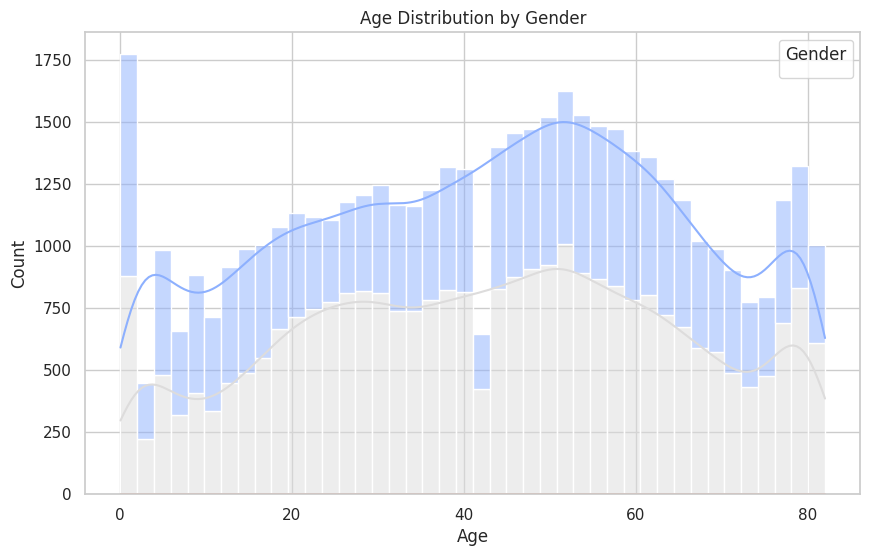

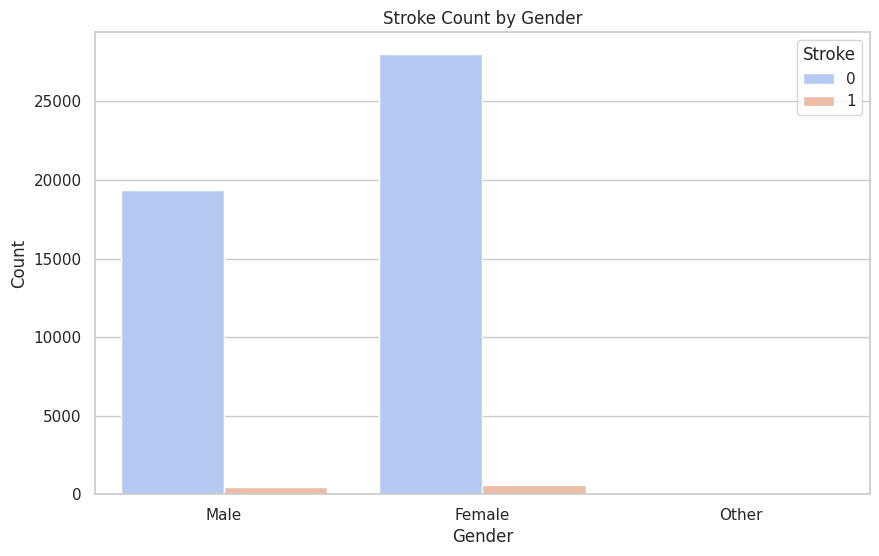

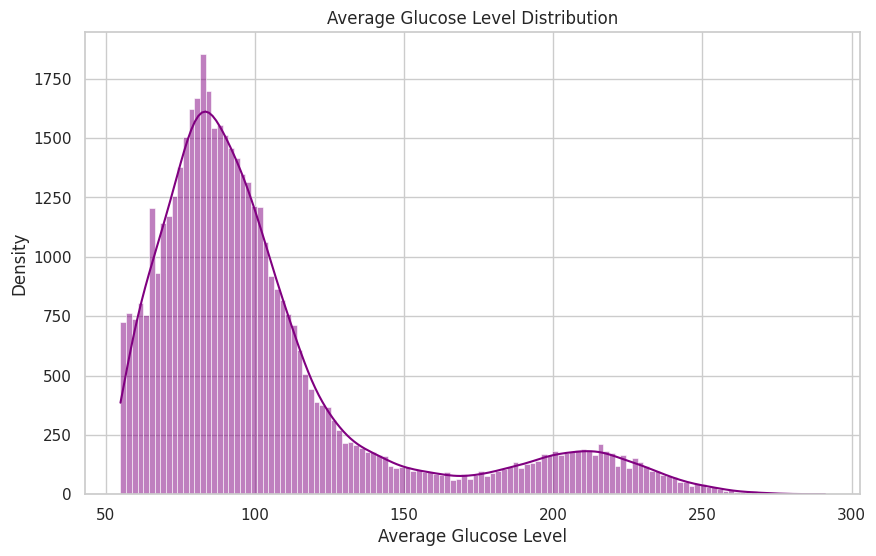

<ipython-input-18-c3ddca02a6f6>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stacked_df, x="stroke", y="bmi", palette="coolwarm")


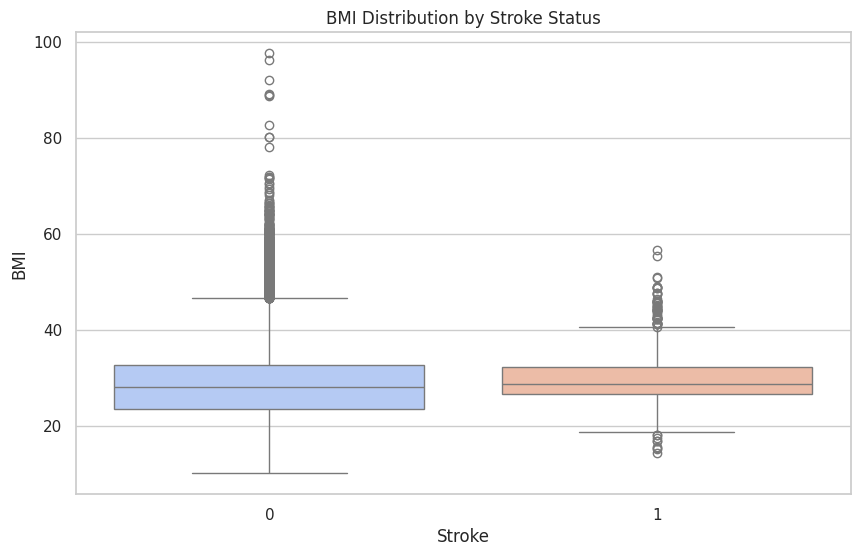

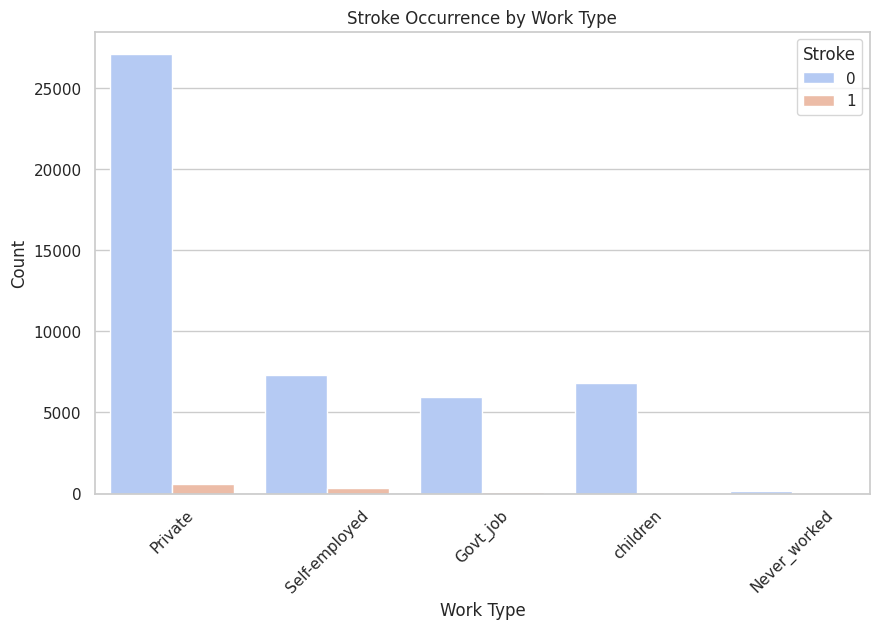

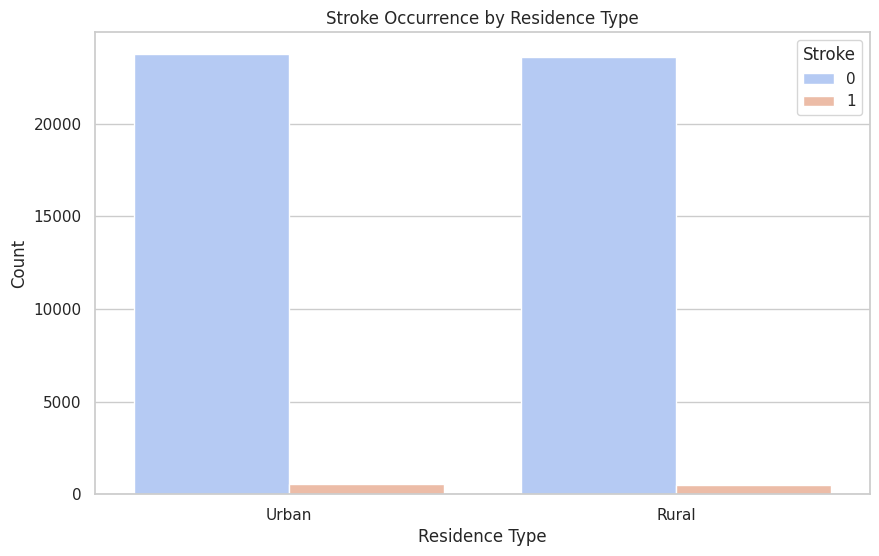

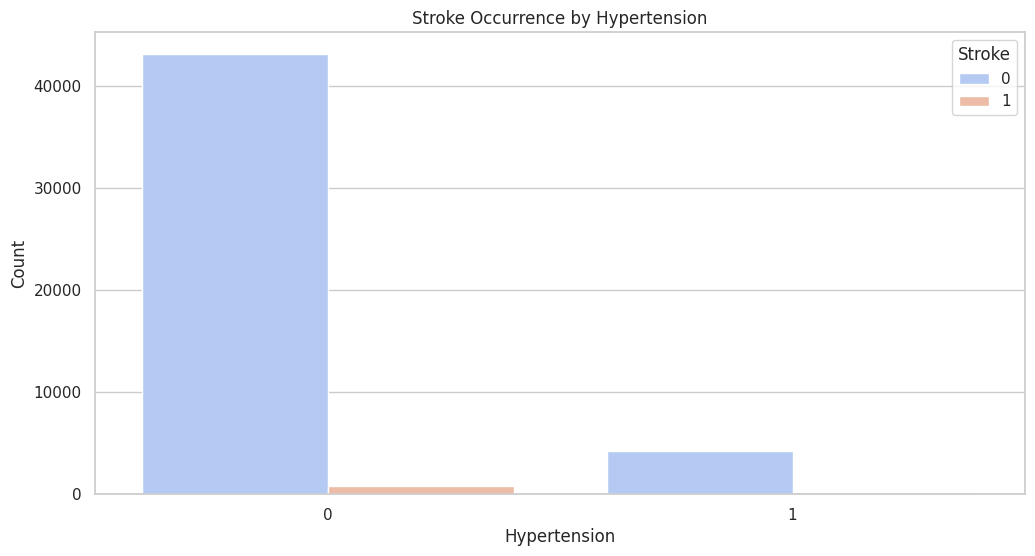

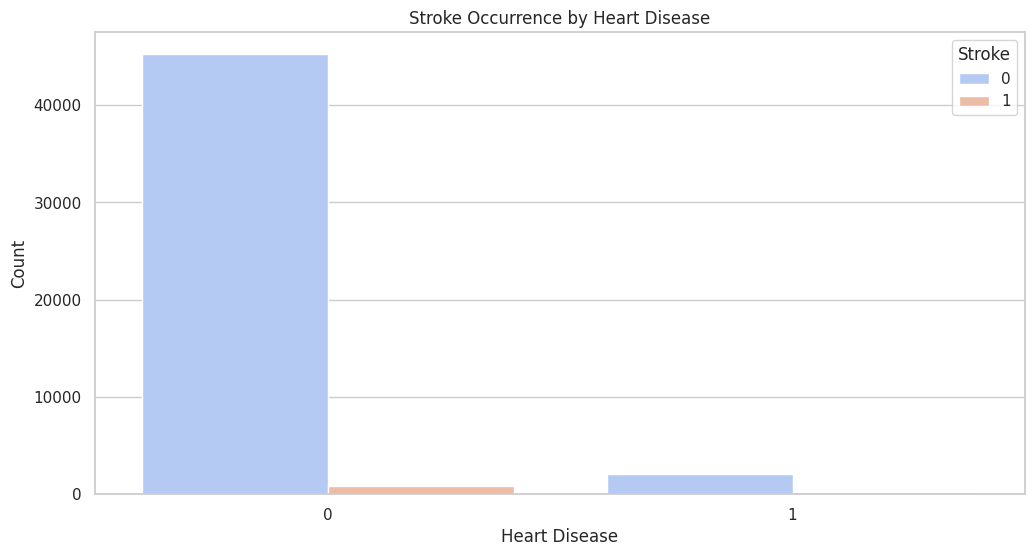

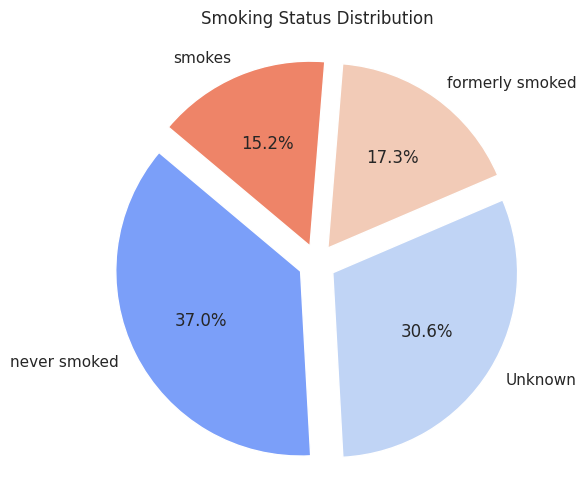

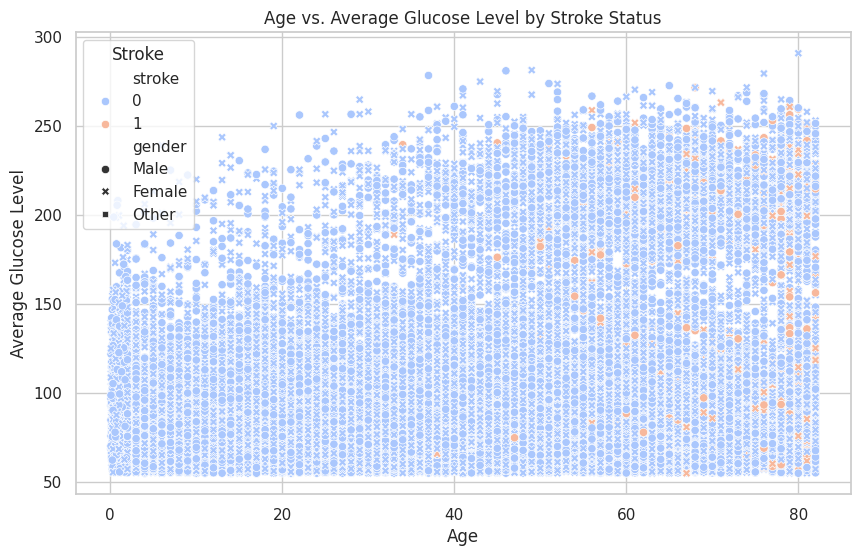

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (make sure to replace 'your_dataset.csv' with the actual path to your dataset)
# df1 = pd.read_csv('your_dataset.csv')

# Plot settings
sns.set(style="whitegrid")

# Plot 1: Age Distribution by Gender
plt.figure(figsize=(10, 6))
sns.histplot(stacked_df, x="age", hue="gender", multiple="stack", kde=True, palette="coolwarm")
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Plot 2: Stroke Count by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=stacked_df, x="gender", hue="stroke", palette="coolwarm")
plt.title('Stroke Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()

# Plot 3: Average Glucose Level Distribution
plt.figure(figsize=(10, 6))
sns.histplot(stacked_df, x="avg_glucose_level", kde=True, color='purple')
plt.title('Average Glucose Level Distribution')
plt.xlabel('Average Glucose Level')
plt.ylabel('Density')
plt.show()

# Plot 4: BMI Distribution by Stroke Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=stacked_df, x="stroke", y="bmi", palette="coolwarm")
plt.title('BMI Distribution by Stroke Status')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

# Plot 5: Stroke Occurrence by Work Type
plt.figure(figsize=(10, 6))
sns.countplot(data=stacked_df, x="work_type", hue="stroke", palette="coolwarm")
plt.title('Stroke Occurrence by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.xticks(rotation=45)
plt.show()

# Plot 6: Stroke Occurrence by Residence Type
plt.figure(figsize=(10, 6))
sns.countplot(data=stacked_df, x="Residence_type", hue="stroke", palette="coolwarm")
plt.title('Stroke Occurrence by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()

# Plot 7: Hypertension and Heart Disease Correlation with Stroke
# Hypertension
plt.figure(figsize=(12, 6))
sns.countplot(data=stacked_df, x="hypertension", hue="stroke", palette="coolwarm")
plt.title('Stroke Occurrence by Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()

# Heart Disease
plt.figure(figsize=(12, 6))
sns.countplot(data=stacked_df, x="heart_disease", hue="stroke", palette="coolwarm")
plt.title('Stroke Occurrence by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()

# Plot 8: Smoking Status Distribution
plt.figure(figsize=(10, 6))
unique_smoking_status = stacked_df['smoking_status'].value_counts()
unique_smoking_status.plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette("coolwarm", len(unique_smoking_status)),
    startangle=140,
    explode=[0.1] * len(unique_smoking_status)
)
plt.title('Smoking Status Distribution')
plt.ylabel('')
plt.show()

# Plot 9: Scatter Plot of Age vs. Average Glucose Level colored by Stroke Status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stacked_df, x="age", y="avg_glucose_level", hue="stroke", palette="coolwarm", style="gender")
plt.title('Age vs. Average Glucose Level by Stroke Status')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.legend(title='Stroke')
plt.show()



<ipython-input-20-fad35a1de5ba>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1, 0], data=stacked_df, x="stroke", y="bmi", palette="coolwarm")


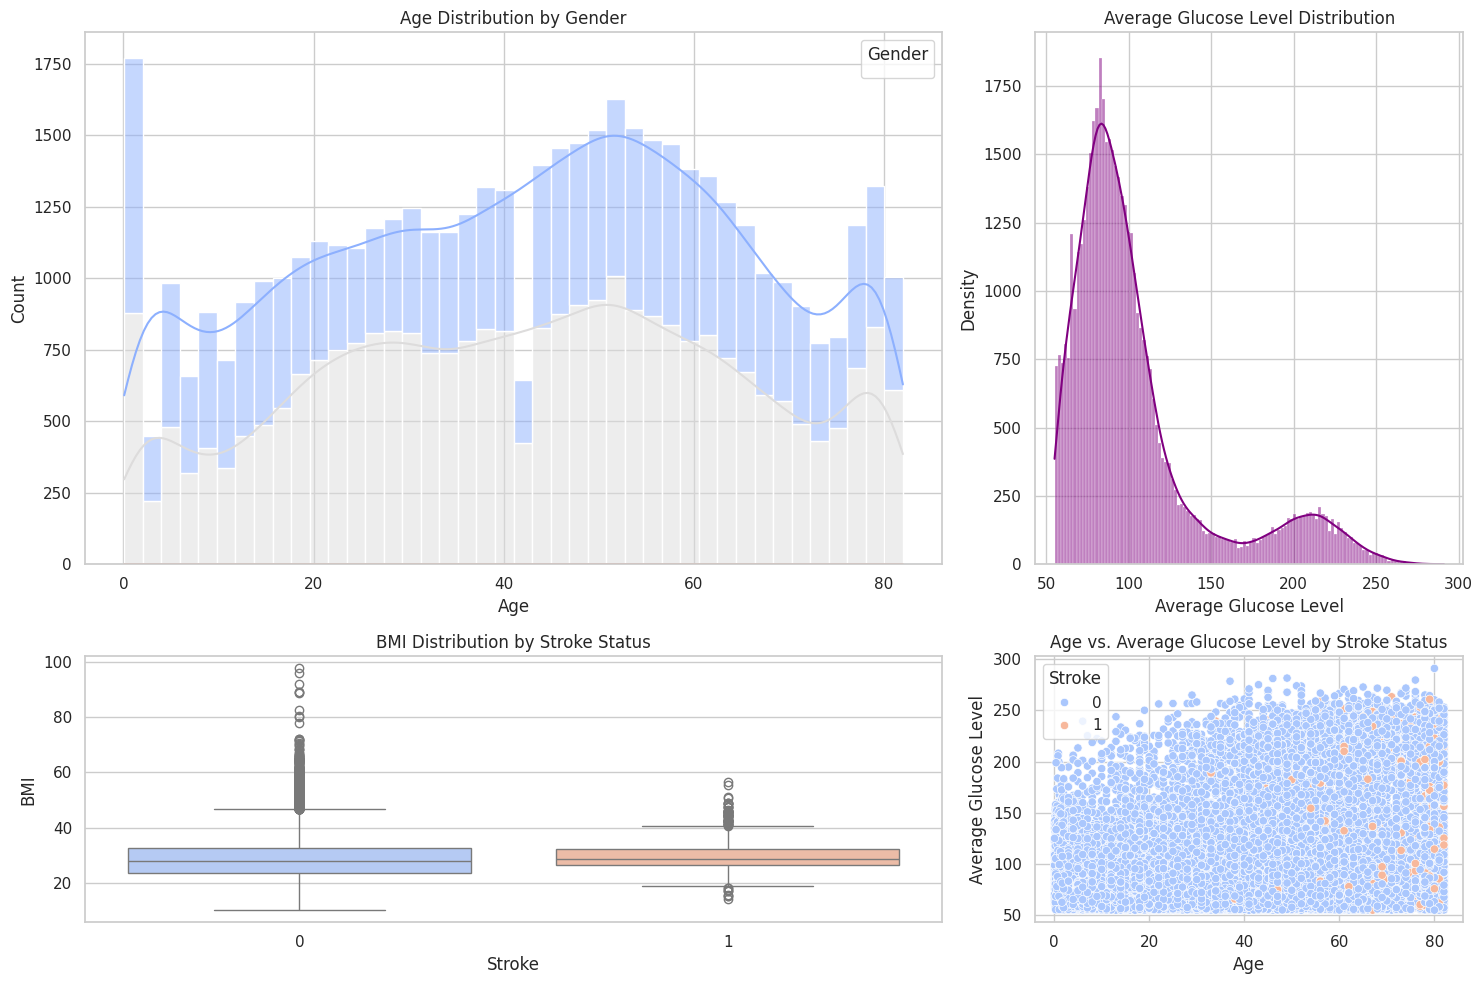

In [20]:
# Define a grid of 2x2 subplots
grid_kws = {'width_ratios': (2, 1), 'height_ratios': (2, 1)}
fig, axes = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw=grid_kws)

# Plot 1: Age Distribution by Gender (top left)
sns.histplot(ax=axes[0, 0], data=stacked_df, x="age", hue="gender", multiple="stack", kde=True, palette="coolwarm")
axes[0, 0].set_title('Age Distribution by Gender')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Gender')

# Plot 3: Average Glucose Level Distribution (top right)
sns.histplot(ax=axes[0, 1], data=stacked_df, x="avg_glucose_level", kde=True, color='purple')
axes[0, 1].set_title('Average Glucose Level Distribution')
axes[0, 1].set_xlabel('Average Glucose Level')
axes[0, 1].set_ylabel('Density')

# Plot 4: BMI Distribution by Stroke Status (bottom left)
sns.boxplot(ax=axes[1, 0], data=stacked_df, x="stroke", y="bmi", palette="coolwarm")
axes[1, 0].set_title('BMI Distribution by Stroke Status')
axes[1, 0].set_xlabel('Stroke')
axes[1, 0].set_ylabel('BMI')

# Plot 9: Scatter Plot of Age vs. Average Glucose Level colored by Stroke Status (bottom right)
sns.scatterplot(ax=axes[1, 1], data=stacked_df, x="age", y="avg_glucose_level", hue="stroke", palette="coolwarm")
axes[1, 1].set_title('Age vs. Average Glucose Level by Stroke Status')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Average Glucose Level')
axes[1, 1].legend(title='Stroke')

# Adjust layout
plt.tight_layout()
plt.show()

In [6]:
# Splitting into X and y
X = stacked_df.drop(columns=['stroke'])  # Dropping 'stroke' column to get features
y = stacked_df['stroke']

In [7]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked


In [8]:
y

0        1
1        1
2        1
3        1
4        1
        ..
43395    0
43396    0
43397    0
43398    0
43399    0
Name: stroke, Length: 48381, dtype: int64

In [9]:
# Define preprocessing for numerical columns (imputation + scaling)
numerical_features = ['age', 'avg_glucose_level', 'bmi']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [10]:
# Define preprocessing for categorical columns (imputation + one-hot encoding)
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [11]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [12]:
# Splitting data into training + validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ensure both classes are present in training and validation set
print("Training set class distribution:", y_train_val.value_counts())
print("Test set class distribution:", y_test.value_counts())

# Splitting the training + validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Ensure both classes are present in training and validation set
print("Training set class distribution after split:", y_train.value_counts())
print("Validation set class distribution after split:", y_val.value_counts())

# Preprocess the training data
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

Training set class distribution: stroke
0    37879
1      825
Name: count, dtype: int64
Test set class distribution: stroke
0    9471
1     206
Name: count, dtype: int64
Training set class distribution after split: stroke
0    28409
1      619
Name: count, dtype: int64
Validation set class distribution after split: stroke
0    9470
1     206
Name: count, dtype: int64


In [13]:
# Train the model on the original training data
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
val_score = model.score(X_val, y_val)
test_score = model.score(X_test, y_test)

print(f'Training set score: {train_score}')
print(f'Validation set score: {val_score}')
print(f'Test set score: {test_score}')


Training set score: 1.0
Validation set score: 0.9841876808598594
Test set score: 0.982845923323344


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Define individual classifiers for stacking and voting
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

# Define the stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('svm', svm)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

# Define the voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('svm', svm)
    ],
    voting='soft'
)

# Hyperparameter tuning for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# Train the models
best_rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
svm.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)
voting_clf.fit(X_train, y_train)

# Evaluate the models
models = {
    'Random Forest': best_rf,
    'Gradient Boosting': gb,
    'SVM': svm,
    'Stacking Classifier': stacking_clf,
    'Voting Classifier': voting_clf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} accuracy: {accuracy:.2f}')


Random Forest accuracy: 0.98
Gradient Boosting accuracy: 0.98
SVM accuracy: 0.98
Stacking Classifier accuracy: 0.98
Voting Classifier accuracy: 0.98
